# Deep Learning: LSTM Model

In [ ]:
!pip install mplfinance

In [ ]:
# Import necessary libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf

import warnings
warnings.filterwarnings("ignore")

## Get the Data stock quote

In [ ]:
# Define the ticker symbol for AUD/USD
quote = 'AUDUSD=X'  # Yahoo Finance symbol for AUD/USD

# Define the date range for historical data
start_date = '2013-01-01'
end_date = '2023-12-01'

# Download historical data
df = yf.download(quote, start=start_date, end=end_date)

# View the data
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,1.038799,1.044495,1.038702,1.039901,1.039901,0
2013-01-02,1.039296,1.052499,1.039285,1.039166,1.039166,0
2013-01-03,1.049307,1.052787,1.047735,1.049296,1.049296,0
2013-01-04,1.045096,1.046704,1.039685,1.045303,1.045303,0
2013-01-07,1.049571,1.050817,1.046890,1.049538,1.049538,0


In [ ]:
# The shape of the dataset
num_rows, num_columns = df.shape
print(f'This currency pair dataset has {num_rows} rows and {num_columns} columns.')


This currency pair dataset has 2844 rows and 6 columns.


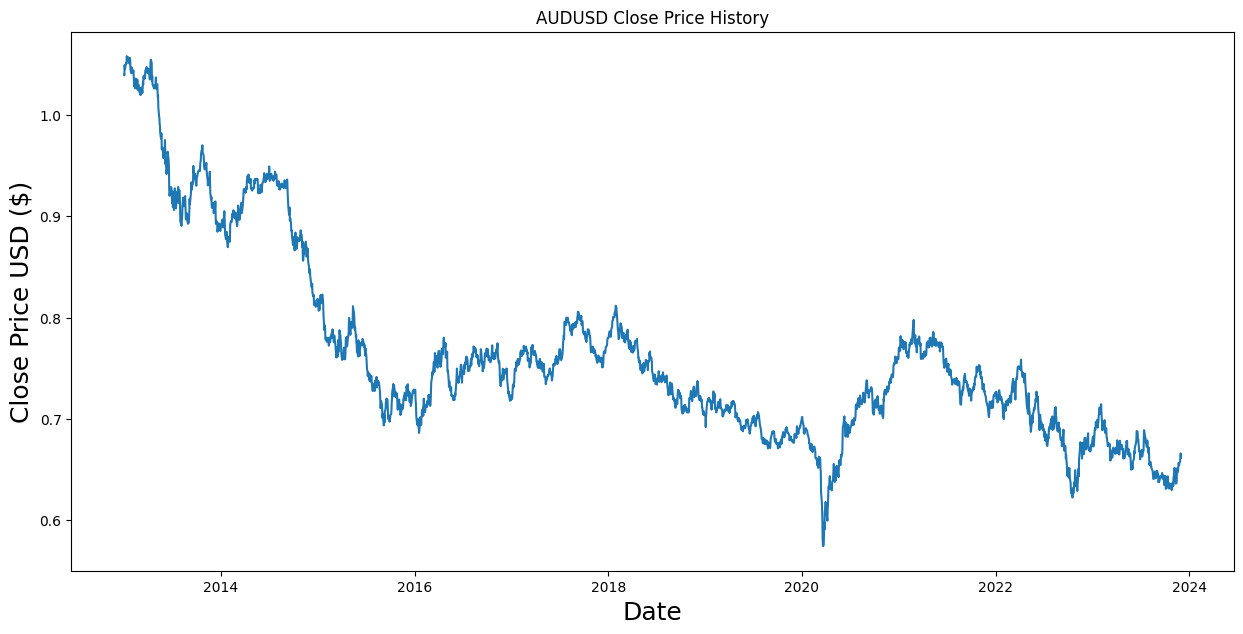

In [ ]:
# Visualize the closing price history
plt.figure(figsize=(15, 7))
plt.title('AUDUSD Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show();


The above line plot shows us that the Australian Dollar has been losing to the United States Dollar over the past ten years. Hence the downward trend.

In [ ]:
# Create a new dataframe with only the close column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the LSTM model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len


2276

## Data Scaling

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train datasets
x_train = []  # features
y_train = []  # target variable / dependent

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()


[array([0.96251709, 0.96099809, 0.98193833, 0.9736851 , 0.98243932,
       0.98581469, 0.98622573, 0.9846503 , 1.        , 0.99121867,
       0.99667269, 0.99803496, 0.9954738 , 0.99291856, 0.9848785 ,
       0.98670578, 0.99639595, 0.99101217, 0.97224052, 0.96551665,
       0.96733408, 0.97698777, 0.96661573, 0.96937946, 0.96809777,
       0.97120329, 0.96066319, 0.94618881, 0.93846714, 0.94676152,
       0.93451833, 0.95004891, 0.95465471, 0.95250435, 0.9419263 ,
       0.94596875, 0.95217216, 0.93138718, 0.94089621, 0.94168504,
       0.93591288, 0.92839526, 0.92804877, 0.92530378, 0.92060803,
       0.92217829, 0.9351938 , 0.92830851, 0.93597843, 0.92508791,
       0.93770247, 0.94804   , 0.94205789, 0.95863432, 0.95319091,
       0.9614668 , 0.95469907, 0.95818902, 0.97100048, 0.97280436])]
[0.9756294435376465]



In [ ]:
# Convert the x_train and the y_train to numpy arrays and use them to train the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the x_train data since LSTM works on 3D data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


## Define the hyperparameters

In [ ]:
# LSTM Hyperparameteers
lstm_units = 50
dense_units = 25
batch_size = 64
epochs = 20

# Build the LSTM model with explicit input shape
model = Sequential()
model.add(LSTM(lstm_units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(lstm_units, return_sequences=False))
model.add(Dense(dense_units))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


## Model Training

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)


Epoch 1/20
35/35 [==============================] - 7s 77ms/step - loss: 0.0285
Epoch 2/20
35/35 [==============================] - 3s 78ms/step - loss: 0.0012
Epoch 3/20
35/35 [==============================] - 3s 89ms/step - loss: 5.7352e-04
Epoch 4/20
35/35 [==============================] - 4s 109ms/step - loss: 5.3558e-04
Epoch 5/20
35/35 [==============================] - 5s 143ms/step - loss: 5.2141e-04
Epoch 6/20
35/35 [==============================] - 5s 142ms/step - loss: 5.1053e-04
Epoch 7/20
35/35 [==============================] - 6s 170ms/step - loss: 4.9366e-04
Epoch 8/20
35/35 [==============================] - 6s 160ms/step - loss: 5.0378e-04
Epoch 9/20
35/35 [==============================] - 6s 160ms/step - loss: 4.7622e-04
Epoch 10/20
35/35 [==============================] - 5s 150ms/step - loss: 4.6166e-04
Epoch 11/20
35/35 [==============================] - 5s 139ms/step - loss: 4.4785e-04
Epoch 12/20
35/35 [==============================] - 3s 79ms/step - loss: 

## Model Evaluation

In [ ]:
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array so that we can use it in the LSTM model
x_test = np.array(x_test)

In [ ]:
# Get the predicted values from the model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


18/18 [==============================] - 1s 17ms/step


## RMSE

In [ ]:
# Get the root mean squared error (RMSE) which is how accurate the model predicts the response
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse


0.0016087444735244966

Our RMSE of 0.0016 for an AUD/USD our predictive model indicates that our model has accurate predictions, with errors that are relatively small in the context of the AUDUSD currency pair's exchange rate.

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

threshold = 0.5

# Assuming you have binary classes 'Up' and 'Down'
y_true_class = np.where(y_test > predictions, 'Down', 'Up')
y_pred_class = np.where(predictions > threshold, 'Down', 'Up')

cm = confusion_matrix(y_true_class, y_pred_class)
cm

array([[236,   0],
       [332,   0]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'Down' is the positive class
pos_label = 'Down'

accuracy = accuracy_score(y_true_class, y_pred_class)
precision = precision_score(y_true_class, y_pred_class, pos_label=pos_label, average='binary')
recall = recall_score(y_true_class, y_pred_class, pos_label=pos_label, average='binary')
f1 = f1_score(y_true_class, y_pred_class, pos_label=pos_label, average='binary')


In [ ]:
!pip install prettytable

In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Metric", "Score"]

# Add rows to the table
table.add_row(["Accuracy", round(accuracy, 4)])
table.add_row(["Precision", round(precision, 4)])
table.add_row(["Recall", round(recall, 4)])
table.add_row(["F1 Score", round(f1, 4)])

table

Metric,Score
Accuracy,0.4155
Precision,0.4155
Recall,1.0
F1 Score,0.5871


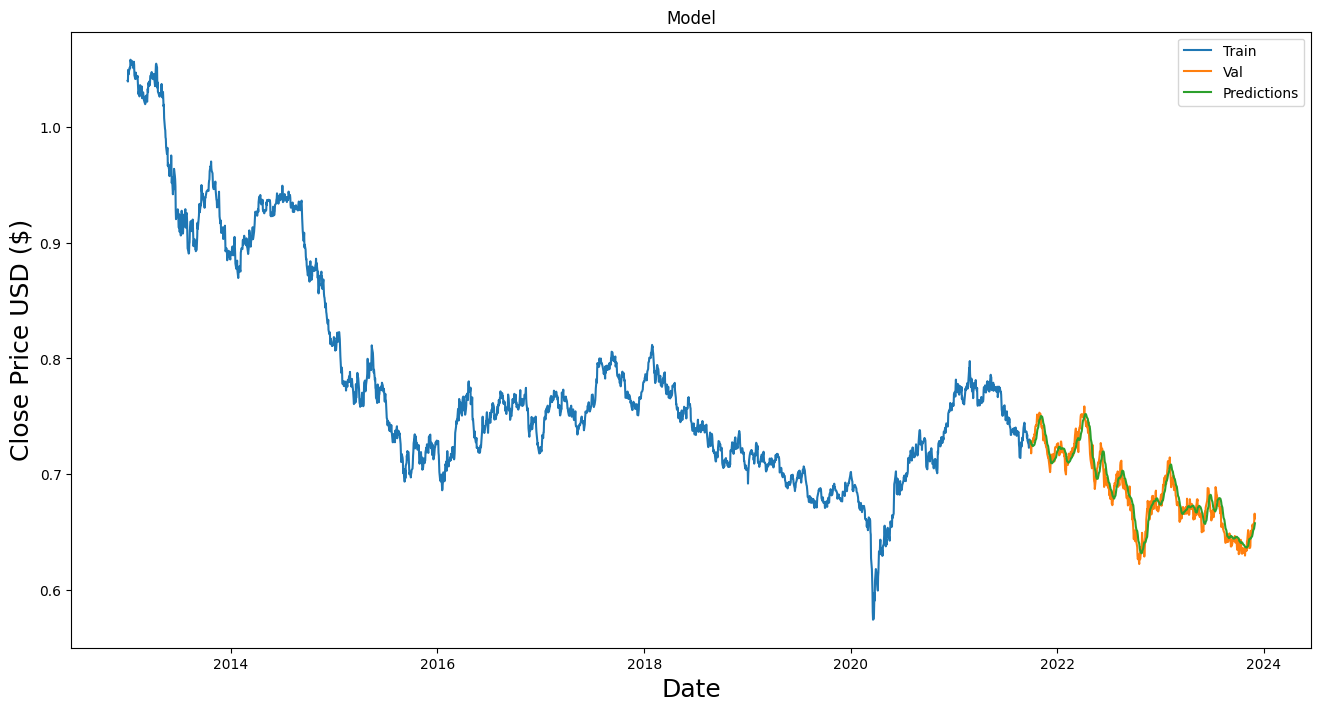

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show();


From the above line plot, we see that our model did a good job of predicting our currency pair over the past ten years, as seen above. The valid values are so close to the predicted values, which gives the impression that our model is a good fit for predicting future prices for other currency pairs in the stock market.

In [ ]:
valid

,Close,Predictions
Date,,
2021-09-28,0.728060,0.728567
2021-09-29,0.724428,0.727764
2021-09-30,0.718000,0.726981
2021-10-01,0.723118,0.725887
2021-10-04,0.727521,0.724946
...,...,...
2023-11-24,0.656010,0.651539
2023-11-27,0.658130,0.652946
2023-11-28,0.661250,0.654360


# New Data

In [ ]:
# Define the ticker symbol for XAU/USD (gold)
gold_quote = 'AUDUSD=X'  # Yahoo Finance symbol for XAU/USD

start_date = '2013-01-01'
end_date = '2023-12-01'

# Download historical data for gold
gold_df = yf.download(gold_quote, start=start_date, end=end_date)

# View the data
gold_df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,1.038799,1.044495,1.038702,1.039901,1.039901,0
2013-01-02,1.039296,1.052499,1.039285,1.039166,1.039166,0
2013-01-03,1.049307,1.052787,1.047735,1.049296,1.049296,0
2013-01-04,1.045096,1.046704,1.039685,1.045303,1.045303,0
2013-01-07,1.049571,1.050817,1.046890,1.049538,1.049538,0


## Preprocess the New Data (Gold vs USD)

In [ ]:
# Create a new dataframe with only the close column
gold_data = gold_df.filter(['Close'])

# Convert the dataframe to a numpy array
gold_dataset = gold_data.values

# Scale the data using the same scaler used for training data
scaled_gold_data = scaler.transform(gold_dataset)


## Prepare the test data for LSTM

In [ ]:
# Create the test dataset
test_data_gold = scaled_gold_data

x_test_gold = []
y_test_gold = gold_dataset

for i in range(60, len(test_data_gold)):
    x_test_gold.append(test_data_gold[i-60:i, 0])

# Convert the data to a numpy array
x_test_gold = np.array(x_test_gold)


## Predictions

In [ ]:
model = Sequential()
model.add(LSTM(lstm_units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(lstm_units, return_sequences=False))
model.add(Dense(dense_units))
model.add(Dense(1))

In [ ]:
# Reshape the test data for LSTM
x_test_gold = np.reshape(x_test_gold, (x_test_gold.shape[0], x_test_gold.shape[1], 1))

# Get the predicted values from the model
predictions_gold = model.predict(x_test_gold)

# Inverse transform the predictions to get actual values
predictions_gold = scaler.inverse_transform(predictions_gold)


87/87 [==============================] - 3s 24ms/step


## Evaluation

In [ ]:
# Trim y_test_gold to match the length of predictions_gold
y_test_gold_trimmed = y_test_gold[:len(predictions_gold)]

# Get the root mean squared error (RMSE) for gold
rmse_gold = np.sqrt(np.mean((predictions_gold - y_test_gold_trimmed) ** 2))
print(f'RMSE for Gold: {rmse_gold}')

RMSE for Gold: 0.20374623515381687


# Model Deployment

In [ ]:
# Save the trained model
model.save('model.h5')

# Save the scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
from keras.models import load_model
import joblib

def make_prediction(input_sequence):
    # Convert the input sequence to a numpy array
    input_array = np.array(input_sequence)

    # Reshape the array to have shape (len(input_array), 1)
    input_array = np.reshape(input_array, (len(input_array), 1))

    # Scale the input data
    scaled_input = scaler.transform(input_array)

    # Reshape the array to match the input shape of the LSTM model
    scaled_input = np.reshape(scaled_input, (1, len(input_array), 1))

    # Make predictions using the loaded model
    prediction = model.predict(scaled_input)

    # Inverse transform the prediction
    prediction = scaler.inverse_transform(prediction)

    # Get the actual predicted values
    actual_prediction = (prediction[0] * (np.max(input_sequence) - np.min(input_sequence))) + np.min(input_sequence)

    return actual_prediction

# Get user input
user_input = input("Enter a comma-separated list of data points: ")

try:
    # Split the input string into a list of values
    user_input_sequence = [float(value.strip()) for value in user_input.split(',')]
except ValueError:
    print("Invalid input. Please enter a valid numerical value.")
    exit()

# Make prediction
if user_input_sequence:
    prediction_result = make_prediction(user_input_sequence)
    print(f'Prediction: {prediction_result}')
else:
    print("No input provided.")

Enter a comma-separated list of data points: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
1/1 [==============================] - 1s 835ms/step
Prediction: [41.79973]


# Possible Areas of Enhancement

1. **Hyperparameter Tuning:** Experiment with different hyperparameter values such as the number of LSTM units, dense units, batch size, and epochs. Fine-tuning these parameters can significantly impact the model's performance.

2. **Model Architecture:** Exploration of a diffrent architectures for the LSTM Model i.e., adding more layer, adjusting the number of units or by changing the number of dense layers in the model.

3. **Feature Engineering:** Considering other relevant additional features into the model to improve its performance for better predictions.

4. **Data Preprocessing:** Use of other different scaling methods e.g., exploring the impact when more hostorical data is used for training the model.

4. **Time Series Specific Techniques:** Exploring time series techniques such such lagging, rolling averages etc to better the performance of the model.

# References


*	Torres, J. F., Hadjout, D., Sebaa, A., Martínez-Álvarez, F., & Troncoso, A. (2021). Deep learning for time  series forecasting: a survey. Big Data, 9(1), 3-21.

*	Lim, B., & Zohren, S. (2021). Time-series forecasting with deep learning: a survey. Philosophical Transactions of the Royal Society A, 379(2194), 20200209.

*	Ismail Fawaz, H., Forestier, G., Weber, J., Idoumghar, L., & Muller, P. A. (2019). Deep learning for time series classification: a review. Data mining and knowledge discovery, 33(4), 917-963.

* Yan, B., & Aasma, M. (2020). A novel deep learning framework: Prediction and analysis of financial time series using CEEMD and LSTM. Expert systems with applications, 159, 113609.

* Yadav, D., & Jin, T. (2023). Transformer based anomaly detection on multivariate time series subledger data.
